#### Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import the datasets

In [ ]:
from google.colab import drive

# Unmount first (if already mounted)
drive.flush_and_unmount()

# Mount Google Drive
drive.mount('/content/drive')

!ls '/content/drive/MyDrive/'

train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')    # Replace 'test.csv' with the actual file name and path of your test dataset

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive
 Adaboost.ipynb
 AUB
'Convex MPC.ipynb'
 Data_input.xlsx
'Decision Tree.ipynb'
'Gradient Boost.ipynb'
'Graduate Applications'
'Job Applications'
'LightGBM - Copy.ipynb'
 LightGBM_Optimization2.ipynb
'LightGBM - Optimization.ipynb'
'Linear Regression.ipynb'
"Master's"
 MLP.ipynb
 Mohamad.ipynb
'New Features.ipynb'
'Optimal Power Flow via Machine Learning '
 OTB
'PHMP - G2'
'Random Forests.ipynb'
 sample_submission.csv
 SBC
'SBC Projects  (File responses)'
'SBC Projects .gform'
'SBC Projects  (Responses).gsheet'
'SOP - Optimization.gdoc'
'Students for Sustainable Energy for All (SSEA) AUB Position Recruitment (Responses).gsheet'
 test.csv
 train.csv
 Untitled
 Untitled0.ipynb
'Untitled (1)'
 Untitled1.ipynb
 XGBoost.ipynb
'yes (1).csv'


#### Exploratory data analysis has been done earlier

#### Fill the missing data

In [ ]:
# Assuming you have already loaded the training dataset into the train_df dataframe

# Check for missing data in each column
missing_data_train = train_df.isnull().sum()

# Display the missing data counts for each column
print("Missing Data in Training Dataset:")
print(missing_data_train)

# Assuming you have already loaded the training dataset into the train_df dataframe

# Check for missing data in each column
missing_data_test = test_df.isnull().sum()

# Display the missing data counts for each column
print("Missing Data in Training Dataset:")
print(missing_data_test)



Missing Data in Training Dataset:
RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64
Missing Data in Training Dataset:
RowId              0
In

In [ ]:
# Assuming you have already loaded the training dataset into the train_df dataframe

# Fill missing values with values from the previous or next row if they are the same
train_df = train_df.ffill().bfill()

# Check if there are still any missing values
missing_data_train_after_fill = train_df.isnull().sum()

# Display the missing data counts after filling missing values
print("Missing Data in Training Dataset after filling:")
print(missing_data_train_after_fill)

# Assuming you have already loaded the training dataset into the train_df dataframe

# Fill missing values with values from the previous or next row if they are the same
test_df = test_df.ffill().bfill()

# Check if there are still any missing values
missing_data_test_after_fill = test_df.isnull().sum()

# Display the missing data counts after filling missing values
print("Missing Data in Testing Dataset after filling:")
print(missing_data_test_after_fill)

Missing Data in Training Dataset after filling:
RowId                      0
IntersectionId             0
Latitude                   0
Longitude                  0
EntryStreetName            0
ExitStreetName             0
EntryHeading               0
ExitHeading                0
Hour                       0
Weekend                    0
Month                      0
Path                       0
TotalTimeStopped_p20       0
TotalTimeStopped_p40       0
TotalTimeStopped_p50       0
TotalTimeStopped_p60       0
TotalTimeStopped_p80       0
TimeFromFirstStop_p20      0
TimeFromFirstStop_p40      0
TimeFromFirstStop_p50      0
TimeFromFirstStop_p60      0
TimeFromFirstStop_p80      0
DistanceToFirstStop_p20    0
DistanceToFirstStop_p40    0
DistanceToFirstStop_p50    0
DistanceToFirstStop_p60    0
DistanceToFirstStop_p80    0
City                       0
dtype: int64
Missing Data in Testing Dataset after filling:
RowId              0
IntersectionId     0
Latitude           0
Longitude        

#### Feature Extraction

##### Combine City and IntersectionId to get a unique intersection

In [ ]:
# Assuming you have already loaded the training dataset into the train_df dataframe

# Create a new feature by combining 'City' and 'IntersectionId'
train_df['CityIntersection'] = train_df['City'] + '_' + train_df['IntersectionId'].astype(str)
test_df['CityIntersection'] = test_df['City'] + '_' + test_df['IntersectionId'].astype(str)

##### New feature: number of entry + exit directions from each intersection

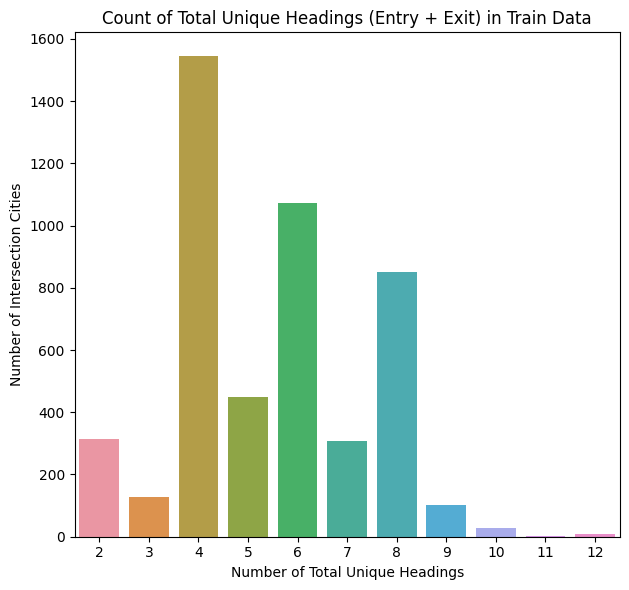

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have train_df and test_data loaded

# Convert 'IntersectionId' to string
train_df['IntersectionId'] = train_df['IntersectionId'].astype(str)

# Merge 'IntersectionId' and 'City' into one feature
train_df['CityIntersection'] = train_df['City'] + '-' + train_df['IntersectionId']

# Calculate the number of unique entryheadings and exitheadings for each CityIntersection
entry_exit_counts_train = train_df.groupby('CityIntersection').agg({'EntryHeading': 'nunique', 'ExitHeading': 'nunique'}).reset_index()

# Sum the counts for entryheadings and exitheadings
entry_exit_counts_train['TotalUniqueHeadings'] = entry_exit_counts_train['EntryHeading'] + entry_exit_counts_train['ExitHeading']
# Count the occurrences of each unique total heading count
count_occurrences_total_train = entry_exit_counts_train['TotalUniqueHeadings'].value_counts().reset_index()

# Rename columns for clarity
count_occurrences_total_train.columns = ['TotalUniqueHeadings', 'IntersectionCityCount']

# Sort the data for better visualization
count_occurrences_total_train = count_occurrences_total_train.sort_values(by='TotalUniqueHeadings')

# Plot bar graphs using Seaborn
plt.figure(figsize=(12, 6))

# Train Data
plt.subplot(1, 2, 1)
sns.barplot(x='TotalUniqueHeadings', y='IntersectionCityCount', data=count_occurrences_total_train)
plt.title('Count of Total Unique Headings (Entry + Exit) in Train Data')
plt.xlabel('Number of Total Unique Headings')
plt.ylabel('Number of Intersection Cities')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

train_df = pd.merge(train_df, entry_exit_counts_train[['CityIntersection', 'TotalUniqueHeadings']], on='CityIntersection', how='left')


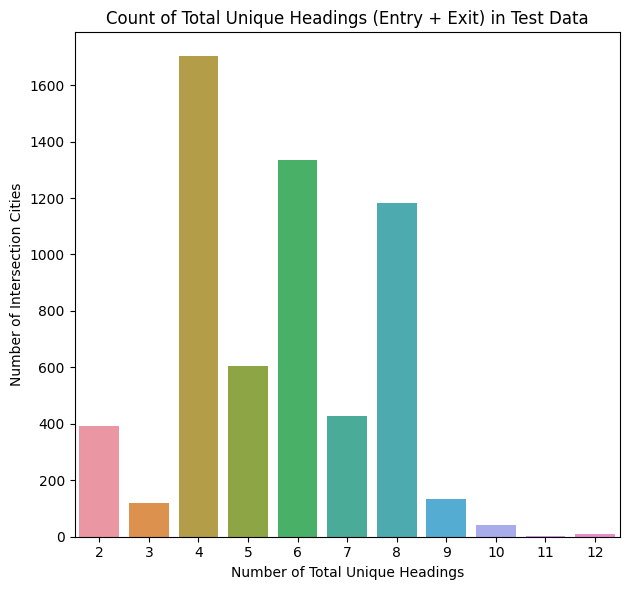

In [ ]:
# Convert 'IntersectionId' to string
test_df['IntersectionId'] = test_df['IntersectionId'].astype(str)

# Merge 'IntersectionId' and 'City' into one feature
test_df['CityIntersection'] = test_df['City'] + '-' + test_df['IntersectionId']

# Calculate the number of unique entryheadings and exitheadings for each CityIntersection
entry_exit_counts_test = test_df.groupby('CityIntersection').agg({'EntryHeading': 'nunique', 'ExitHeading': 'nunique'}).reset_index()

# Sum the counts for entryheadings and exitheadings
entry_exit_counts_test['TotalUniqueHeadings'] = entry_exit_counts_test['EntryHeading'] + entry_exit_counts_test['ExitHeading']

# Count the occurrences of each unique total heading count
count_occurrences_total_test = entry_exit_counts_test['TotalUniqueHeadings'].value_counts().reset_index()

# Rename columns for clarity
count_occurrences_total_test.columns = ['TotalUniqueHeadings', 'IntersectionCityCount']

# Sort the data for better visualization
count_occurrences_total_test = count_occurrences_total_test.sort_values(by='TotalUniqueHeadings')

# Plot bar graphs using Seaborn
plt.figure(figsize=(12, 6))

# Test Data
plt.subplot(1, 2, 2)
sns.barplot(x='TotalUniqueHeadings', y='IntersectionCityCount', data=count_occurrences_total_test)
plt.title('Count of Total Unique Headings (Entry + Exit) in Test Data')
plt.xlabel('Number of Total Unique Headings')
plt.ylabel('Number of Intersection Cities')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Merge the test data with the entry_exit_counts_test dataframe
test_df = pd.merge(test_df, entry_exit_counts_test[['CityIntersection', 'TotalUniqueHeadings']], on='CityIntersection', how='left')


##### Encode the entry and exit street names

In [ ]:
# Assuming you have already loaded the training dataset into the train_df dataframe

# Define a function to apply the encoding
def street_encoding(street_name):
    if 'road' in street_name.lower():
        return 1
    elif 'street' in street_name.lower() or 'avenue' in street_name.lower():
        return 2
    elif 'drive' in street_name.lower() or 'broad' in street_name.lower():
        return 3
    elif 'boulevard' in street_name.lower():
        return 4
    else:
        return 0  # Return 0 if none of the conditions are met

# Apply the encoding to the EntryStreetName and ExitStreetName columns
train_df['EntryStreetEncoding'] = train_df['EntryStreetName'].apply(street_encoding)
train_df['ExitStreetEncoding'] = train_df['ExitStreetName'].apply(street_encoding)

# Apply the encoding to the EntryStreetName and ExitStreetName columns
test_df['EntryStreetEncoding'] = test_df['EntryStreetName'].apply(street_encoding)
test_df['ExitStreetEncoding'] = test_df['ExitStreetName'].apply(street_encoding)

##### Encode the entry and exit headings

In [ ]:
# Define the extended encoding mapping
heading_mapping = {
    'N': 0, 'NE': 1/4, 'E': 1/2, 'SE': 3/4, 'S': 1, 'SW': 5/4, 'W': 3/2, 'NW': 7/4
}

# Apply the extended encoding to 'EntryHeading' and 'ExitHeading'
train_df['EncodedEntryHeading'] = train_df['EntryHeading'].map(heading_mapping)
train_df['EncodedExitHeading'] = train_df['ExitHeading'].map(heading_mapping)


In [ ]:
# Apply the extended encoding to 'EntryHeading' and 'ExitHeading' in the test data
test_df['EncodedEntryHeading'] = test_df['EntryHeading'].map(heading_mapping)
test_df['EncodedExitHeading'] = test_df['ExitHeading'].map(heading_mapping)


##### Encode the difference between entry and exitheading

In [ ]:
# Find the difference between entry and exit headings for each row
train_df['EncodedHeadingDifference'] = train_df['EncodedEntryHeading'] - train_df['EncodedExitHeading']
# Find the difference between entry and exit headings for each row in the test data
test_df['EncodedHeadingDifference'] = test_df['EncodedEntryHeading'] - test_df['EncodedExitHeading']


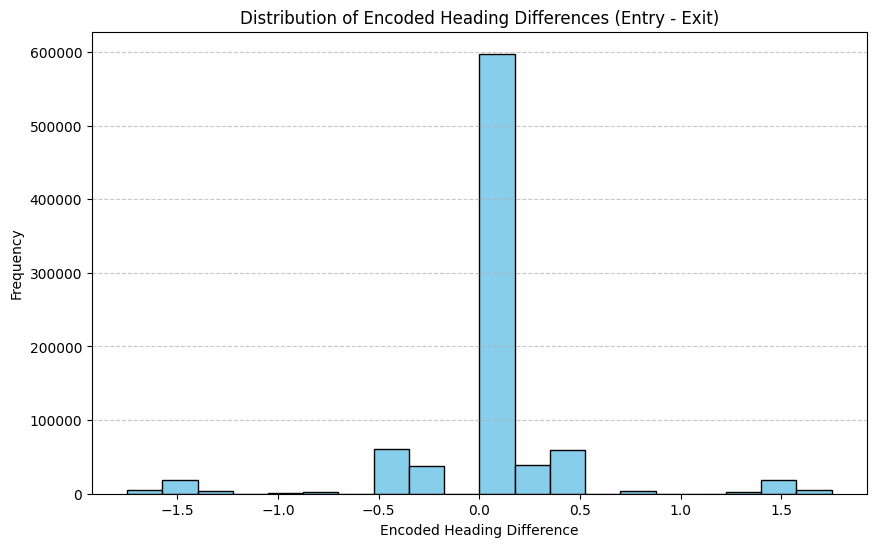

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for the difference between entry and exit headings encoded
plt.figure(figsize=(10, 6))
plt.hist(train_df['EncodedHeadingDifference'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Encoded Heading Differences (Entry - Exit)')
plt.xlabel('Encoded Heading Difference')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


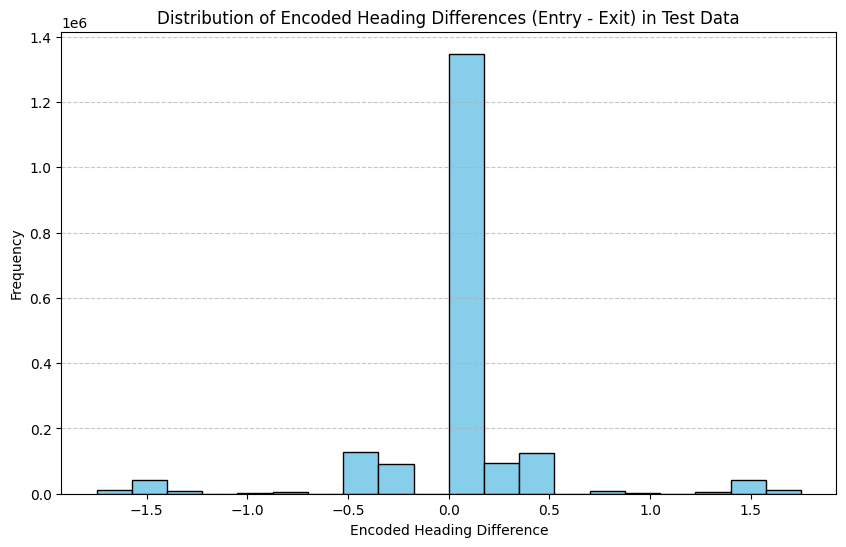

In [ ]:
# Plot histogram for the difference between entry and exit headings encoded in the test data
plt.figure(figsize=(10, 6))
plt.hist(test_df['EncodedHeadingDifference'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Encoded Heading Differences (Entry - Exit) in Test Data')
plt.xlabel('Encoded Heading Difference')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### MinMax scaling for longitude and latitude

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# train_df = ...

# Convert the first letter of 'City' to uppercase
train_df['City'] = train_df['City'].str.capitalize()

# Create a new DataFrame with scaled 'Longitude' and 'Latitude' using MinMaxScaler
scaler = MinMaxScaler()

# Define a function to apply MinMaxScaler to each column separately
def scale_columns(group):
    return pd.DataFrame(scaler.fit_transform(group), columns=group.columns, index=group.index)

# Apply scaling and add scaled columns to train_df
scaled_columns = train_df.groupby('City')[['Longitude', 'Latitude']].apply(scale_columns)
scaled_columns = scaled_columns.reset_index(level=0, drop=True)  # Reset the index for alignment
train_df[['ScaledLongitude', 'ScaledLatitude']] = scaled_columns


<ipython-input-14-5c31d6b78b96>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  scaled_columns = train_df.groupby('City')[['Longitude', 'Latitude']].apply(scale_columns)


In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Convert the first letter of 'City' to uppercase in the test data
test_df['City'] = test_df['City'].str.capitalize()

# Create a new DataFrame with scaled 'Longitude' and 'Latitude' using MinMaxScaler for the test data
scaled_columns_test = test_df.groupby('City')[['Longitude', 'Latitude']].apply(scale_columns)
scaled_columns_test = scaled_columns_test.reset_index(level=0, drop=True)  # Reset the index for alignment
test_df[['ScaledLongitude', 'ScaledLatitude']] = scaled_columns_test


<ipython-input-15-9d3f7438d2ce>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  scaled_columns_test = test_df.groupby('City')[['Longitude', 'Latitude']].apply(scale_columns)


##### Distance to downtown

In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# train_df = ...

# 1. Insert long and lat of city centre for each city
city_centers = {
    'Atlanta': {'Longitude': -84.3880, 'Latitude': 33.7490},
    'Chicago': {'Longitude': -87.6298, 'Latitude': 41.8781},
    'Philadelphia': {'Longitude': -75.1652, 'Latitude': 39.9526},
    'Boston': {'Longitude': -71.0589, 'Latitude': 42.3601}
}

for city, center in city_centers.items():
    train_df.loc[train_df['City'] == city, 'CityCenterLongitude'] = center['Longitude']
    train_df.loc[train_df['City'] == city, 'CityCenterLatitude'] = center['Latitude']

# 2. Calculate the distance of every entry to the downtown of its corresponding city (using Euclidean distance)
train_df['DistanceToCityCenter'] = ((train_df['Latitude'] - train_df['CityCenterLatitude'])**2 + (train_df['Longitude'] - train_df['CityCenterLongitude'])**2)**0.5

# Display the DataFrame with the new features
print("First 5 entries of the DataFrame with new features:")
print(train_df[['City', 'Longitude', 'Latitude', 'DistanceToCityCenter']].head())


First 5 entries of the DataFrame with new features:
      City  Longitude   Latitude  DistanceToCityCenter
0  Atlanta -84.430032  33.791659              0.059887
1  Atlanta -84.430032  33.791659              0.059887
2  Atlanta -84.430032  33.791659              0.059887
3  Atlanta -84.430032  33.791659              0.059887
4  Atlanta -84.430032  33.791659              0.059887


In [ ]:
# Sample DataFrame (replace this with your actual DataFrame)
# test_df = ...

# 1. Insert long and lat of city centre for each city in the test data
for city, center in city_centers.items():
    test_df.loc[test_df['City'] == city, 'CityCenterLongitude'] = center['Longitude']
    test_df.loc[test_df['City'] == city, 'CityCenterLatitude'] = center['Latitude']

# 2. Calculate the distance of every entry to the downtown of its corresponding city in the test data (using Euclidean distance)
test_df['DistanceToCityCenter'] = ((test_df['Latitude'] - test_df['CityCenterLatitude'])**2 + (test_df['Longitude'] - test_df['CityCenterLongitude'])**2)**0.5

# Display the DataFrame with the new features for the test data
print("First 5 entries of the DataFrame with new features for the test data:")
print(test_df[['City', 'Longitude', 'Latitude', 'DistanceToCityCenter']].head())


First 5 entries of the DataFrame with new features for the test data:
      City  Longitude  Latitude  DistanceToCityCenter
0  Atlanta -84.393032  33.75094              0.005393
1  Atlanta -84.393032  33.75094              0.005393
2  Atlanta -84.393032  33.75094              0.005393
3  Atlanta -84.393032  33.75094              0.005393
4  Atlanta -84.393032  33.75094              0.005393


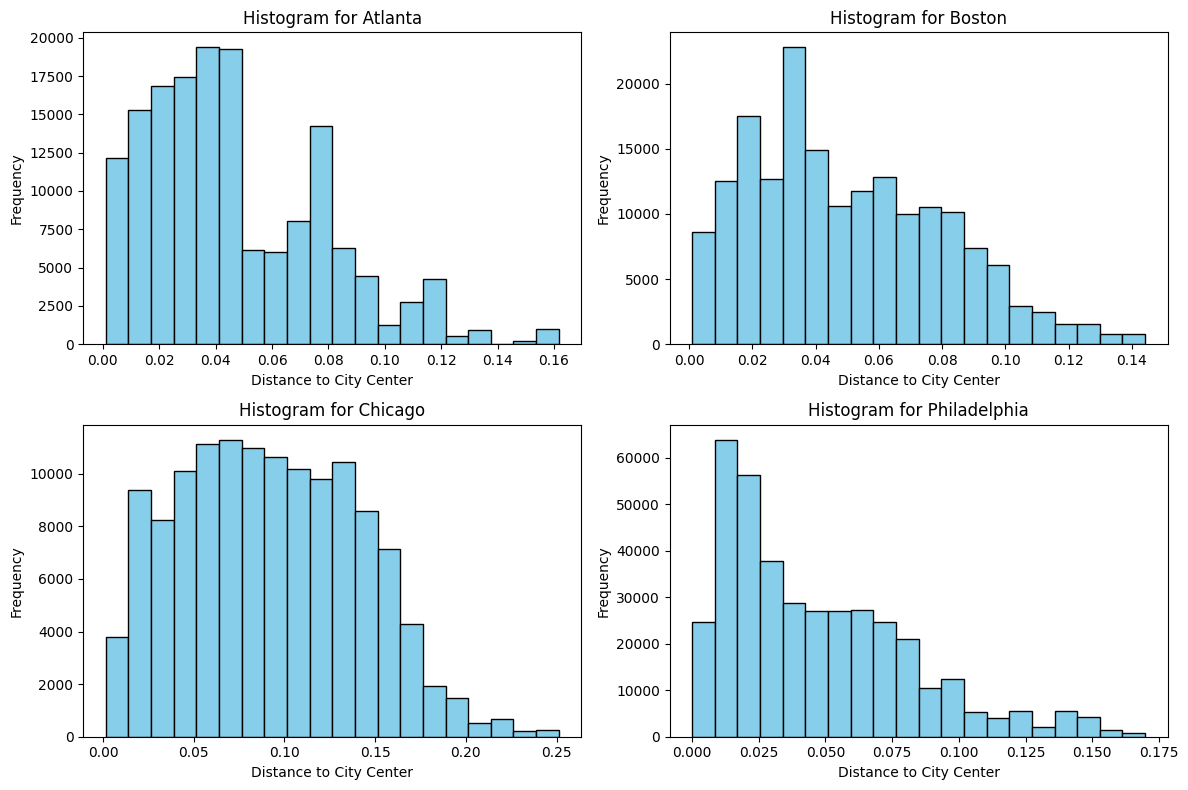

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_df is your DataFrame with the 'DistanceToCityCenter' and 'City' columns
# train_df = ...

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Convert the first letter of 'City' to uppercase
train_df['City'] = train_df['City'].str.capitalize()

# Iterate through each city and create a histogram in the corresponding subplot
for (city, group), ax in zip(train_df.groupby('City'), axes.flatten()):
    ax.hist(group['DistanceToCityCenter'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {city}')
    ax.set_xlabel('Distance to City Center')
    ax.set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


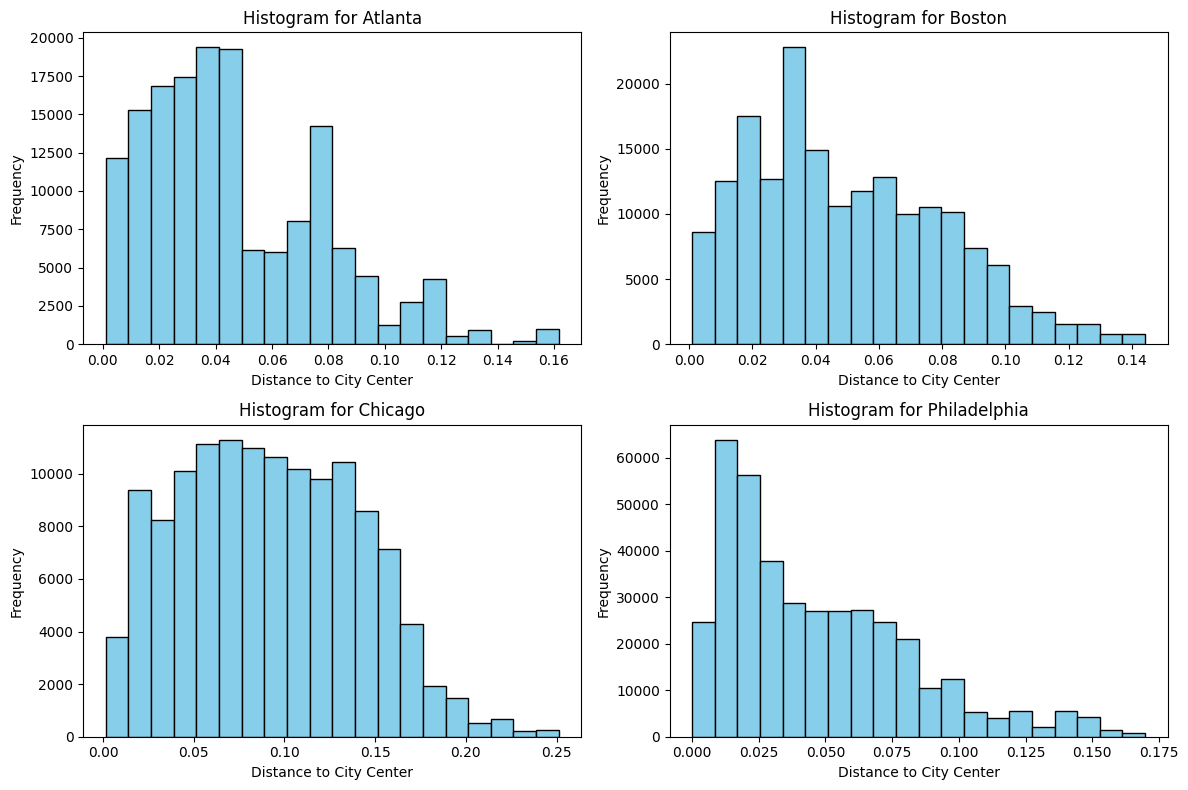

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_df is your DataFrame with the 'DistanceToCityCenter' and 'City' columns
# train_df = ...

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Convert the first letter of 'City' to uppercase
train_df['City'] = train_df['City'].str.capitalize()

# Iterate through each city and create a histogram in the corresponding subplot
for (city, group), ax in zip(train_df.groupby('City'), axes.flatten()):
    ax.hist(group['DistanceToCityCenter'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {city}')
    ax.set_xlabel('Distance to City Center')
    ax.set_ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# train_df = ...

# Convert the first letter of 'City' to uppercase
train_df['City'] = train_df['City'].str.capitalize()

# Create a new DataFrame with scaled 'Longitude', 'Latitude', and 'DistanceToCityCenter' using MinMaxScaler
scaler = MinMaxScaler()

# Define a function to apply MinMaxScaler to each column separately
def scale_columns(group):
    scaled_values = scaler.fit_transform(group)
    return pd.DataFrame(scaled_values, columns=group.columns, index=group.index)

# Columns to scale
columns_to_scale = ['DistanceToCityCenter']

# Apply scaling and add scaled columns to train_df
scaled_columns = train_df.groupby('City')[columns_to_scale].apply(scale_columns)
scaled_columns = scaled_columns.reset_index(level=0, drop=True)  # Reset the index for alignment

# Assign the scaled values directly to a new column in the original DataFrame
train_df['ScaledDistanceToCityCenter'] = scaled_columns['DistanceToCityCenter']

# Display the DataFrame with the scaled features
print(train_df[['City', 'Longitude', 'Latitude', 'DistanceToCityCenter', 'ScaledDistanceToCityCenter']].head())


<ipython-input-20-15c2137206e6>:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  scaled_columns = train_df.groupby('City')[columns_to_scale].apply(scale_columns)


      City  Longitude   Latitude  DistanceToCityCenter  \
0  Atlanta -84.430032  33.791659              0.059887   
1  Atlanta -84.430032  33.791659              0.059887   
2  Atlanta -84.430032  33.791659              0.059887   
3  Atlanta -84.430032  33.791659              0.059887   
4  Atlanta -84.430032  33.791659              0.059887   

   ScaledDistanceToCityCenter  
0                    0.366375  
1                    0.366375  
2                    0.366375  
3                    0.366375  
4                    0.366375  


In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Convert the first letter of 'City' to uppercase in the test data
test_df['City'] = test_df['City'].str.capitalize()

# Create a new DataFrame with scaled 'DistanceToCityCenter' using MinMaxScaler for the test data
scaled_columns_test = test_df.groupby('City')[columns_to_scale].apply(scale_columns)
scaled_columns_test = scaled_columns_test.reset_index(level=0, drop=True)  # Reset the index for alignment

# Assign the scaled values directly to a new column in the original test DataFrame
test_df['ScaledDistanceToCityCenter'] = scaled_columns_test['DistanceToCityCenter']

# Display the DataFrame with the scaled features for the test data
print(test_df[['City', 'Longitude', 'Latitude', 'DistanceToCityCenter', 'ScaledDistanceToCityCenter']].head())


<ipython-input-21-7250ec832110>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  scaled_columns_test = test_df.groupby('City')[columns_to_scale].apply(scale_columns)


      City  Longitude  Latitude  DistanceToCityCenter  \
0  Atlanta -84.393032  33.75094              0.005393   
1  Atlanta -84.393032  33.75094              0.005393   
2  Atlanta -84.393032  33.75094              0.005393   
3  Atlanta -84.393032  33.75094              0.005393   
4  Atlanta -84.393032  33.75094              0.005393   

   ScaledDistanceToCityCenter  
0                    0.027237  
1                    0.027237  
2                    0.027237  
3                    0.027237  
4                    0.027237  


##### Transformation for hour

In [ ]:
# Perform sin and cos transformations on the 'Hour' feature
train_df['sin_hour'] = np.sin(2 * np.pi * train_df['Hour'] / 24)
train_df['cos_hour'] = np.cos(2 * np.pi * train_df['Hour'] / 24)

# Display the DataFrame with the new transformed features
print(train_df[['Hour', 'sin_hour', 'cos_hour']].head())

   Hour  sin_hour  cos_hour
0     0  0.000000  1.000000
1     0  0.000000  1.000000
2     1  0.258819  0.965926
3     1  0.258819  0.965926
4     2  0.500000  0.866025


In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Perform sin and cos transformations on the 'Hour' feature in the test data
test_df['sin_hour'] = np.sin(2 * np.pi * test_df['Hour'] / 24)
test_df['cos_hour'] = np.cos(2 * np.pi * test_df['Hour'] / 24)

# Display the DataFrame with the new transformed features for the test data
print(test_df[['Hour', 'sin_hour', 'cos_hour']].head())


   Hour  sin_hour  cos_hour
0     0  0.000000  1.000000
1     0  0.000000  1.000000
2     1  0.258819  0.965926
3     1  0.258819  0.965926
4     2  0.500000  0.866025


##### Transformation for month

In [ ]:
# Perform sin and cos transformations on the 'Month' feature
train_df['sin_month'] = np.sin(2 * np.pi * train_df['Month'] / 12)
train_df['cos_month'] = np.cos(2 * np.pi * train_df['Month'] / 12)

# Display the DataFrame with the new transformed features
print(train_df[['Month', 'sin_month', 'cos_month']].head())

   Month     sin_month  cos_month
0      6  1.224647e-16       -1.0
1      6  1.224647e-16       -1.0
2      6  1.224647e-16       -1.0
3      6  1.224647e-16       -1.0
4      6  1.224647e-16       -1.0


In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Perform sin and cos transformations on the 'Month' feature in the test data
test_df['sin_month'] = np.sin(2 * np.pi * test_df['Month'] / 12)
test_df['cos_month'] = np.cos(2 * np.pi * test_df['Month'] / 12)

# Display the DataFrame with the new transformed features for the test data
print(test_df[['Month', 'sin_month', 'cos_month']].head())


   Month     sin_month  cos_month
0      6  1.224647e-16       -1.0
1      6  1.224647e-16       -1.0
2      6  1.224647e-16       -1.0
3      6  1.224647e-16       -1.0
4      6  1.224647e-16       -1.0


##### Binary variable for rush hour

In [ ]:
# Define rush hours for all days
rush_hours = range(7, 10)  # for example, 7 AM to 10 AM

# Create a binary feature 'IsRushHour' (considering Weekend = 0)
train_df['IsRushHour'] = (train_df['Weekend'] == 0) & train_df['Hour'].isin(rush_hours)

# Display the DataFrame with the new 'IsRushHour' feature
print(train_df[['Hour', 'Weekend', 'IsRushHour']].head())


   Hour  Weekend  IsRushHour
0     0        0       False
1     0        0       False
2     1        0       False
3     1        0       False
4     2        0       False


In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Create a binary feature 'IsRushHour' in the test data (considering Weekend = 0)
test_df['IsRushHour'] = (test_df['Weekend'] == 0) & test_df['Hour'].isin(rush_hours)

# Display the DataFrame with the new 'IsRushHour' feature for the test data
print(test_df[['Hour', 'Weekend', 'IsRushHour']].head())


   Hour  Weekend  IsRushHour
0     0        0       False
1     0        0       False
2     1        0       False
3     1        0       False
4     2        0       False


##### Binary variable for day/night

In [ ]:
# Define daytime hours
daytime_hours = range(6, 18)  # for example, 6 AM to 6 PM

# Create a binary feature 'IsDaytime'
train_df['IsDaytime'] = train_df['Hour'].isin(daytime_hours)

In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Create a binary feature 'IsDaytime' in the test data
test_df['IsDaytime'] = test_df['Hour'].isin(daytime_hours)

# Display the DataFrame with the new 'IsDaytime' feature for the test data
print(test_df[['Hour', 'IsDaytime']].head())


   Hour  IsDaytime
0     0      False
1     0      False
2     1      False
3     1      False
4     2      False


##### Drop the useless columns

In [ ]:
# Assuming train_df is your DataFrame
# train_df = ...

# List of columns to drop
columns_to_drop = ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour',
                   'Month', 'Path', 'City_Intersection', 'TotalUniqueHeadings_x', 'CityIntersection',
                   'TotalUniqueHeadings_y', 'CityCenterLongitude', 'CityCenterLatitude',
                    'Latitude', 'Longitude','TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60', 'IsRushHour', 'IsDaytime',
       'TimeFromFirstStop_p80']

# Convert 'IntersectionId' to integer
train_df['IntersectionId'] = train_df['IntersectionId'].astype(int)

# Display the DataFrame after the conversion
print(train_df.head())


# Add columns containing 'p40' and 'p60' to the list of columns to drop
columns_to_drop += [col for col in train_df.columns if 'p40' in col or 'p60' in col]

# Drop the specified columns if they exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in train_df.columns]
train_df = train_df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(train_df.columns)

     RowId  IntersectionId   Latitude  Longitude  \
0  1921357               0  33.791659 -84.430032   
1  1921358               0  33.791659 -84.430032   
2  1921359               0  33.791659 -84.430032   
3  1921360               0  33.791659 -84.430032   
4  1921361               0  33.791659 -84.430032   

                EntryStreetName                ExitStreetName EntryHeading  \
0  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   

  ExitHeading  Hour  Weekend  ...  CityCenterLongitude CityCenterLatitude  \
0          NW     0        0  ...              -84.388             33.749   
1          SE     0        0  ...              -84.388          

In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# Convert 'IntersectionId' to integer in the test data
test_df['IntersectionId'] = test_df['IntersectionId'].astype(int)

# Display the DataFrame after the conversion for the test data
print(test_df.head())

# Add columns containing 'p40' and 'p60' to the list of columns to drop for the test data
columns_to_drop_test = [col for col in test_df.columns if 'p40' in col or 'p60' in col]

# Drop the specified columns if they exist in the test DataFrame
columns_to_drop_test = [col for col in columns_to_drop if col in test_df.columns]
test_df = test_df.drop(columns=columns_to_drop_test)

# Display the DataFrame after dropping columns for the test data
print(test_df.columns)


   RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094 -84.393032  Peachtree Street Southwest   
1      1               1  33.75094 -84.393032  Peachtree Street Southwest   
2      2               1  33.75094 -84.393032  Peachtree Street Southwest   
3      3               1  33.75094 -84.393032  Peachtree Street Southwest   
4      4               1  33.75094 -84.393032  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  ...  \
0   Mitchell Street Southwest           SW          SE     0        0  ...   
1  Peachtree Street Southwest           SW          SW     0        0  ...   
2  Peachtree Street Southwest           NE          NE     1        0  ...   
3  Peachtree Street Southwest           SW          SW     1        0  ...   
4  Peachtree Street Southwest           NE          NE     2        0  ...   

   CityCenterLongitude CityCenterLatitude DistanceToCityCenter  \
0 

#### Fitting Models

##### Separate the dataset into 4 different datasets

In [ ]:
# List of unique cities in the DataFrame
unique_cities = train_df['City'].unique()

# Create a dictionary to store separate datasets for each city
train_datasets = {}

# Iterate through each unique city and create a separate dataset
for city in unique_cities:
    train_datasets[f'train_{city}'] = train_df[train_df['City'] == city]

# Access the separate datasets using the city name
train_atlanta = train_datasets['train_Atlanta']
train_chicago = train_datasets['train_Chicago']
train_philadelphia = train_datasets['train_Philadelphia']
train_boston = train_datasets['train_Boston']


In [ ]:
# Assuming you already have test_df loaded and similar preprocessing steps applied

# List of unique cities in the test data
unique_cities_test = test_df['City'].unique()

# Create a dictionary to store separate datasets for each city in the test data
test_datasets = {}

# Iterate through each unique city in the test data and create a separate dataset
for city in unique_cities_test:
    test_datasets[f'test_{city}'] = test_df[test_df['City'] == city]

# Access the separate datasets using the city name in the test data
test_atlanta = test_datasets['test_Atlanta']
test_chicago = test_datasets['test_Chicago']
test_philadelphia = test_datasets['test_Philadelphia']
test_boston = test_datasets['test_Boston']


##### Separate each of the datasets into features and targets

In [ ]:
# Assuming train_atlanta is the dataset for Atlanta
# train_atlanta = ...

# Define the target variables
target_variables = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80',
                     'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

# Separate features (X) and targets (y) for Atlanta
X_atlanta = train_atlanta.drop(columns=target_variables)
y_atlanta = train_atlanta[target_variables]

X_boston = train_boston.drop(columns=target_variables)
y_boston = train_boston[target_variables]

X_chicago = train_chicago.drop(columns=target_variables)
y_chicago = train_chicago[target_variables]

X_philadelphia = train_philadelphia.drop(columns=target_variables)
y_philadelphia = train_philadelphia[target_variables]


# Drop the 'City' column from the feature matrix
X_atlanta = X_atlanta.drop(columns=['City', 'RowId'])

# Similarly, drop the 'City' column from other cities
X_boston = X_boston.drop(columns=['City', 'RowId'])
X_chicago = X_chicago.drop(columns=['City', 'RowId'])
X_philadelphia = X_philadelphia.drop(columns=['City', 'RowId'])



In [ ]:
# Test data
# Assuming test_atlanta, test_boston, test_chicago, test_philadelphia are the datasets for each city
# Drop the 'City' column from the feature matrix for each city in the test data
X_atlanta_test = test_atlanta.drop(columns=['City' ,'RowId'])
X_boston_test = test_boston.drop(columns=['City', 'RowId'])
X_chicago_test = test_chicago.drop(columns=['City', 'RowId'])
X_philadelphia_test = test_philadelphia.drop(columns=['City', 'RowId'])

#### Linear Regression

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded and preprocessed datasets for each city
# Replace the placeholders with your actual datasets

# Atlanta
X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta = train_test_split(X_atlanta, y_atlanta, test_size=0.2, random_state=42)
model_atlanta = LinearRegression()
model_atlanta.fit(X_train_atlanta, y_train_atlanta)
y_pred_atlanta = model_atlanta.predict(X_test_atlanta)

# Boston
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
model_boston = LinearRegression()
model_boston.fit(X_train_boston, y_train_boston)
y_pred_boston = model_boston.predict(X_test_boston)

# Chicago
X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago = train_test_split(X_chicago, y_chicago, test_size=0.2, random_state=42)
model_chicago = LinearRegression()
model_chicago.fit(X_train_chicago, y_train_chicago)
y_pred_chicago = model_chicago.predict(X_test_chicago)

# Philadelphia
X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia = train_test_split(X_philadelphia, y_philadelphia, test_size=0.2, random_state=42)
model_philadelphia = LinearRegression()
model_philadelphia.fit(X_train_philadelphia, y_train_philadelphia)
y_pred_philadelphia = model_philadelphia.predict(X_test_philadelphia)

from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Assuming you have already loaded and preprocessed datasets for each city
# Replace the placeholders with your actual datasets

# Atlanta
rmse_linear_regression_atlanta = calculate_rmse(y_test_atlanta, y_pred_atlanta)

# Boston
rmse_linear_regression_boston = calculate_rmse(y_test_boston, y_pred_boston)

# Chicago
rmse_linear_regression_chicago = calculate_rmse(y_test_chicago, y_pred_chicago)

# Philadelphia
rmse_linear_regression_philadelphia = calculate_rmse(y_test_philadelphia, y_pred_philadelphia)

# Display RMSE for each city
print("Root Mean Squared Error - Atlanta:", rmse_linear_regression_atlanta)
print("Root Mean Squared Error - Boston:", rmse_linear_regression_boston)
print("Root Mean Squared Error - Chicago:", rmse_linear_regression_chicago)
print("Root Mean Squared Error - Philadelphia:", rmse_linear_regression_philadelphia)

from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Concatenate true and predicted values for all cities
y_true_all = np.concatenate([y_test_atlanta.values.flatten(),
                             y_test_boston.values.flatten(),
                             y_test_chicago.values.flatten(),
                             y_test_philadelphia.values.flatten()])

y_pred_all = np.concatenate([y_pred_atlanta.flatten(),
                             y_pred_boston.flatten(),
                             y_pred_chicago.flatten(),
                             y_pred_philadelphia.flatten()])

# Calculate overall RMSE
rmse_linear_regression_all = calculate_rmse(y_true_all, y_pred_all)

# Display overall RMSE
print("Overall Root Mean Squared Error:", rmse_linear_regression_all)
'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n# Assuming you have already loaded and preprocessed datasets for each city\n# Replace the placeholders with your actual datasets\n\n# Atlanta\nX_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta = train_test_split(X_atlanta, y_atlanta, test_size=0.2, random_state=42)\nmodel_atlanta = LinearRegression()\nmodel_atlanta.fit(X_train_atlanta, y_train_atlanta)\ny_pred_atlanta = model_atlanta.predict(X_test_atlanta)\n\n# Boston\nX_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)\nmodel_boston = LinearRegression()\nmodel_boston.fit(X_train_boston, y_train_boston)\ny_pred_boston = model_boston.predict(X_test_boston)\n\n# Chicago\nX_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago = train_test_split(X_chicago, y_chicago, test_size=0.2, 

#### KNN regressor

In [ ]:
categorical_features = ['IntersectionId', 'Weekend',
       'EntryStreetEncoding', 'ExitStreetEncoding']
cat_feature_indices = [X_atlanta.columns.get_loc(col) for col in categorical_features]
cat_feature_indices

[0, 1, 3, 4]

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming X_atlanta, X_boston, X_chicago, X_philadelphia are your feature matrices
# and y_atlanta, y_boston, y_chicago, y_philadelphia are your target DataFrames
# Assuming cat_feature_indices contains the indices of categorical features

# Initialize dictionaries to store best parameters and RMSE for each city and target
best_params_per_city = {}
rmse_per_city = {}

# Define lists to store all predicted and true values
all_predicted_values = []
all_true_values = []

# Iterate over each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']

for city in cities:
    X_city = globals()['X_' + city]  # Accessing variables dynamically
    y_city = globals()['y_' + city]

    # Initialize a dictionary to store best parameters for targets in the current city
    best_params_per_target = {}
    rmse_per_target = {}

    # Iterate over each target variable in the current city
    for target_col in y_city.columns:
        # Split the data into training and testing sets for the current target variable in the city
        X_train, X_test, y_train, y_test = train_test_split(X_city, y_city[target_col], test_size=0.2, random_state=42)

        # Define hyperparameters grid for LGBMRegressor including categorical_feature
        param_grid = {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [5],
            'min_child_samples': [2],
            'verbosity': [-1]
            # Add other hyperparameters as needed
        }

        # Initialize LGBMRegressor with categorical feature indices
        lgbm_regressor = LGBMRegressor(random_state=42)

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(estimator=lgbm_regressor, param_grid=param_grid,
                                   scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

        # Fit the grid search to find the best hyperparameters
        grid_search.fit(X_train, y_train, categorical_feature=cat_feature_indices)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        best_params_per_target[target_col] = best_params

        # Initialize LGBMRegressor with the best parameters
        best_lgbm_regressor = LGBMRegressor(**best_params, random_state=42)
        best_lgbm_regressor.fit(X_train, y_train)

        # Make predictions on the test set for the current target variable in the city
        y_pred = best_lgbm_regressor.predict(X_test)

        # Calculate RMSE for the current target variable in the city
        rmse_target = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_per_target[target_col] = rmse_target

        print(f'RMSE for {city.capitalize()}, Target: {target_col}: {rmse_target}')
        print('-' * 50)

        # Store predicted and true values for overall RMSE calculation
        all_predicted_values.extend(y_pred)
        all_true_values.extend(y_test)

    # Store best parameters and RMSE for each target in the city
    best_params_per_city[city] = best_params_per_target
    rmse_per_city[city] = rmse_per_target

    # Calculate RMSE for the city using all target variables
    rmse_city = np.sqrt(mean_squared_error(all_true_values, all_predicted_values))
    print(f'Overall RMSE for {city.capitalize()}: {rmse_city}')
    print('=' * 70)

# Calculate overall RMSE across all cities and targets
overall_rmse_all = np.sqrt(mean_squared_error(all_true_values, all_predicted_values))
print(f'Overall RMSE for All Cities and Targets: {overall_rmse_all}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE for Atlanta, Target: TotalTimeStopped_p20: 7.163509744522791
--------------------------------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE for Atlanta, Target: TotalTimeStopped_p50: 14.243132475861083
--------------------------------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE for Atlanta, Target: TotalTimeStopped_p80: 24.78091870022377
--------------------------------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE for Atlanta, Target: DistanceToFirstStop_p20: 22.455692167020658
--------------------------------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE for Atlanta, Target: DistanceToFirstStop_p50: 66.17305259167652
--------------------------------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE for Atlanta, Target: DistanceToFirstStop_p80: 15

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming X_atlanta, X_boston, X_chicago, X_philadelphia are your feature matrices
# and y_atlanta, y_boston, y_chicago, y_philadelphia are your target DataFrames
# Assuming cat_feature_indices contains the indices of categorical features
# best_params_per_city contains the best parameters for each city and target obtained from the grid search

# Initialize dictionaries to store RMSE for each city and overall RMSE across all cities and targets
rmse_per_city = {}
overall_rmse_all = []
overall_predicted_values = []
overall_true_values = []
all_models = {}  # Dictionary to store all models

# Iterate over each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']

for city in cities:
    city_models = {}
    X_city = globals()['X_' + city]  # Accessing variables dynamically
    y_city = globals()['y_' + city]

    # Initialize a dictionary to store RMSE for each target variable in the current city
    rmse_per_target = {}

    # Iterate over each target variable in the current city
    for target_col in y_city.columns:
        # Split the data into training and testing sets for the current target variable in the city
        X_train, X_test, y_train, y_test = train_test_split(X_city, y_city[target_col], test_size=0.2, random_state=42)

        # Get the best parameters for the current target in the city
        best_params = best_params_per_city[city][target_col]

        # Define categorical features for LGBMRegressor
        cat_feature_indices = [index for index, col in enumerate(X_train.columns) if col in categorical_features]

        # Initialize LGBMRegressor with the best parameters and categorical features
        lgbm_regressor = LGBMRegressor(**best_params, random_state=42)

        # Fit the model on the training data for the current target in the city
        lgbm_regressor.fit(X_train, y_train, categorical_feature=cat_feature_indices)

        # Make predictions on the test set for the current target variable in the city
        y_pred = lgbm_regressor.predict(X_test)

        # Calculate RMSE for the current target variable in the city
        rmse_target = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_per_target[target_col] = rmse_target

        print(f'RMSE for {city.capitalize()}, Target: {target_col}: {rmse_target}')
        print('-' * 50)
        city_models[target_col] = lgbm_regressor

        # Store predicted and true values for overall RMSE calculation
        overall_predicted_values.extend(y_pred)
        overall_true_values.extend(y_test)

    # Store RMSE for each target variable in the current city
    rmse_per_city[city] = rmse_per_target
    all_models[city] = city_models

    # Calculate overall RMSE for the city using all target variables
    overall_rmse_city = np.sqrt(mean_squared_error(overall_true_values, overall_predicted_values))
    overall_rmse_all.append(overall_rmse_city)
    print(f'Overall RMSE for {city.capitalize()}: {overall_rmse_city}')
    print('=' * 70)

# Calculate overall RMSE across all cities and targets
overall_rmse_all = np.mean(overall_rmse_all)
print(f'Overall RMSE for All Cities and Targets: {overall_rmse_all}')


RMSE for Atlanta, Target: TotalTimeStopped_p20: 6.758781809420971
--------------------------------------------------
RMSE for Atlanta, Target: TotalTimeStopped_p50: 12.803139459284814
--------------------------------------------------
RMSE for Atlanta, Target: TotalTimeStopped_p80: 21.466251385977337
--------------------------------------------------
RMSE for Atlanta, Target: DistanceToFirstStop_p20: 21.58615286969885
--------------------------------------------------
RMSE for Atlanta, Target: DistanceToFirstStop_p50: 62.39753125068731
--------------------------------------------------
RMSE for Atlanta, Target: DistanceToFirstStop_p80: 136.1113880276457
--------------------------------------------------
Overall RMSE for Atlanta: 62.65796745404645
RMSE for Boston, Target: TotalTimeStopped_p20: 6.638377606571872
--------------------------------------------------
RMSE for Boston, Target: TotalTimeStopped_p50: 12.662834555591644
--------------------------------------------------
RMSE for B

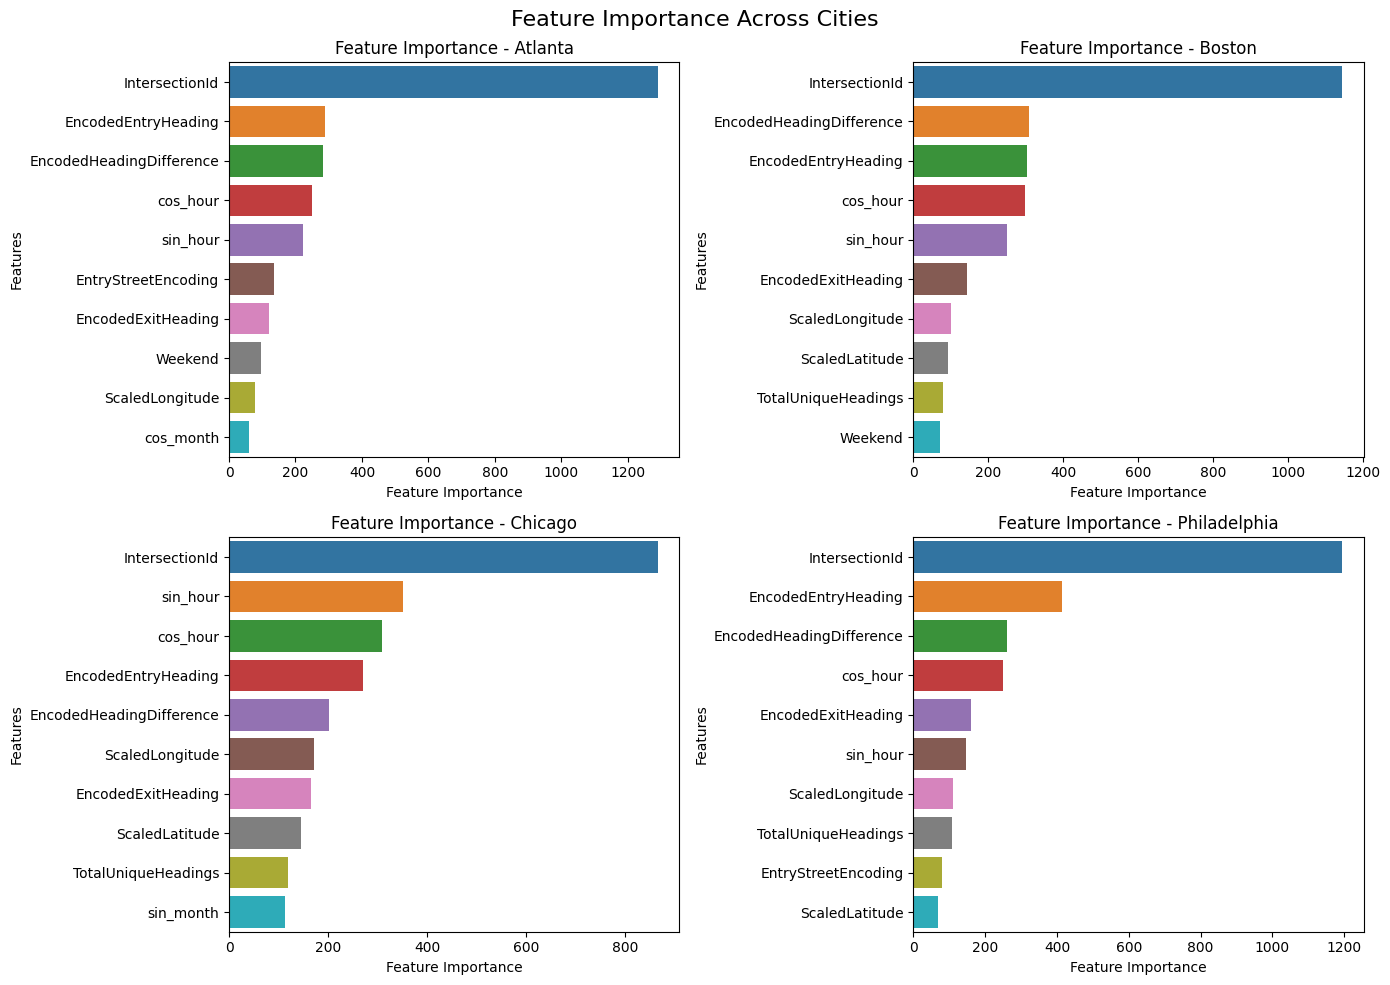

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize dictionaries to store feature importance for each city
feature_importance_per_city = {}

# Iterate over each city to retrieve feature importance
for city, models in all_models.items():
    city_feature_importance = {}
    for target_col, model in models.items():
        feature_importance = model.feature_importances_
        city_feature_importance[target_col] = feature_importance
    feature_importance_per_city[city] = city_feature_importance

X_dict = {'atlanta': X_atlanta, 'boston': X_boston, 'chicago': X_chicago, 'philadelphia': X_philadelphia}

# Plotting feature importance for each city in subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Importance Across Cities', fontsize=16)

for i, (city, importance_dict) in enumerate(feature_importance_per_city.items()):
    row = i // 2
    col = i % 2

    total_importance = np.zeros(len(X_dict[city].columns))
    for target, importance in importance_dict.items():
        total_importance += importance
    total_importance /= 6

    sorted_indices = np.argsort(total_importance)[::-1]  # Sort indices in descending order
    top_features = X_dict[city].columns[sorted_indices][:10]

    sns.barplot(x=total_importance[sorted_indices][:10], y=top_features, ax=axs[row, col])
    axs[row, col].set_title(f'Feature Importance - {city.capitalize()}')
    axs[row, col].set_xlabel('Feature Importance')
    axs[row, col].set_ylabel('Features')

plt.tight_layout()
plt.show()


In [ ]:
importance

array([1229,   80,   22,  139,   65,  231,  111,  364,   69,   23,   23,
        239,  299,   54,   52], dtype=int32)

In [ ]:
import pandas as pd

# Sample predictions (replace this with your actual predictions)
# predictions = model_lgbm_atlanta.predict(X_atlanta_test)

# Assuming you have a list of column names for the target variables
column_names = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80',
                'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

# Dictionary containing models for each target variable
models_per_target_atlanta = all_models['atlanta']  # Assuming you have this structure
models_per_target_boston = all_models['boston']  # Assuming you have this structure
models_per_target_chicago = all_models['chicago']  # Assuming you have this structure
models_per_target_philadelphia = all_models['philadelphia']  # Assuming you have this structure

# Predict each target column separately for Atlanta using respective models
for i, col in enumerate(column_names):

    # Get the model for the current target column
    model_atlanta = models_per_target_atlanta[col]
    model_boston = models_per_target_boston[col]
    model_chicago = models_per_target_chicago[col]
    model_philadelphia = models_per_target_philadelphia[col]

    # Make predictions using the respective model for the current target column
    predictions_atlanta = model_atlanta.predict(X_atlanta_test)
    predictions_boston = model_boston.predict(X_boston_test)
    predictions_chicago = model_chicago.predict(X_chicago_test)
    predictions_philadelphia = model_philadelphia.predict(X_philadelphia_test)

    # Assign the predicted values to the corresponding column in the test DataFrame
    test_atlanta[col] = predictions_atlanta
    test_boston[col] = predictions_boston
    test_chicago[col] = predictions_chicago
    test_philadelphia[col] = predictions_philadelphia

In [ ]:
# Assuming all DataFrames have the same columns and 'RowId' is a common column
# Replace test_atlanta, test_boston, test_chicago, and test_philadelphia with your actual DataFrames

# Concatenating the DataFrames based on 'RowId'
combined_df = pd.concat([test_atlanta, test_boston, test_chicago, test_philadelphia], ignore_index=True)

# Displaying the combined DataFrame
print(combined_df)


In [ ]:
import pandas as pd

# Load the sample_submission.csv file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')  # Replace 'sample_submission.csv' with your file path

# Splitting the 'TargetId' column to extract two numbers
data[['RowId', 'Target_Variable_Number']] = data['TargetId'].str.split('_', expand=True)



In [ ]:
from tqdm import tqdm

# Assuming combined_df and data DataFrames exist, and column_names is defined
# Convert 'RowId' and 'Target_Variable_Number' columns to integers for indexing
data['RowId'] = data['RowId'].astype(int)
data['Target_Variable_Number'] = data['Target_Variable_Number'].astype(int)

# Initialize an empty list to store target values
target_values = []

# Use tqdm to iterate through each row in the 'data' DataFrame
for index, row in tqdm(data.iterrows(), total=len(data), desc='Processing rows'):
    row_id = row['RowId']
    target_var_num = row['Target_Variable_Number']

    # Find the value in combined_df using RowId and Target_Variable_Number
    value = combined_df.loc[row_id, column_names[target_var_num]]

    # Append the found value to the list
    target_values.append(value)

# Add the 'Target_Variable' column to the 'data' DataFrame
data['Target_Variable'] = target_values

# Display the updated 'data' DataFrame with the new 'Target_Variable' column
print(data)


In [ ]:
# Drop the 'Target' column if it exists
if 'Target' in data:
    data.drop(columns=['Target'], inplace=True)

# Drop the 'Target' column if it exists
if 'Target.1' in data:
    data.drop(columns=['Target.1'], inplace=True)

# Create a new DataFrame containing only 'TargetId' and 'Target_Variable' columns
lgbm_submission = data[['TargetId', 'Target_Variable']]

# Rename 'Target_Variable' column to 'Target'
lgbm_submission.rename(columns={'Target_Variable': 'Target'}, inplace=True)

# Export the new DataFrame to a CSV file named 'knn_submission.csv'
#lgbm_submission.to_csv('lgbm_submission.csv', index=False)

# Export the new DataFrame to a CSV file named 'knn_submission.csv'
lgbm_submission.to_csv('lgbm_no_split_submission_new.csv', index=False)



In [ ]:
lgbm_submission.head()

In [ ]:
lol = pd.read_csv("knn_submission.csv")
lol.columns


In [ ]:
# Assuming 'lol' is the DataFrame

# Check if 'Target' column exists and remove it
if 'Target' in lol.columns:
    lol.drop(columns=['Target'], inplace=True)

# Rename 'Target.1' column to 'target' if it exists
if 'Target.1' in lol.columns:
    lol.rename(columns={'Target.1': 'Target'}, inplace=True)

# Print the columns and first few rows
print("Columns after modifications:")
print(lol.columns)

print("\nFirst few rows:")
print(lol.head())


In [ ]:
# Assuming 'lol' is the DataFrame

# Save 'lol' DataFrame to a CSV file named 'knn_submission.csv'
lol.to_csv('knn_submission.csv', index=False)


In [ ]:
hey = pd.read_csv('knn_submission.csv')
print(hey.columns)
hey.head()

In [ ]:
# Assuming 'data' DataFrame and the row number you want to verify are defined

# Define the row number you want to verify (replace this with your desired row number)
row_to_verify = 10

# Extract RowId and Target_Variable_Number from the specified row in data
row_id = data.loc[row_to_verify, 'RowId']
print(data.loc[row_to_verify])
target_var_num = data.loc[row_to_verify, 'Target_Variable_Number']

# Find the corresponding row in combined_df using RowId and Target_Variable_Number
verified_row = combined_df.iloc[row_id]

# Display the verified row from combined_df
print("Verified Row in combined_df:")
print(verified_row)


In [ ]:
'''from sklearn.neighbors import KNeighborsRegressor

# Function to train a KNN model and make predictions
def train_and_predict_knn(X_train, X_test, y_train, y_test, k=3):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)
    return y_pred_knn, rmse_knn

# KNN Regressor for each city (you can choose the value of k)
k_value = 5

y_pred_knn_atlanta, rmse_knn_atlanta = train_and_predict_knn(X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta, k_value)
y_pred_knn_boston, rmse_knn_boston = train_and_predict_knn(X_train_boston, X_test_boston, y_train_boston, y_test_boston, k_value)
y_pred_knn_chicago, rmse_knn_chicago = train_and_predict_knn(X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago, k_value)
y_pred_knn_philadelphia, rmse_knn_philadelphia = train_and_predict_knn(X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia, k_value)

# Concatenate true and predicted values for all cities
y_true_all_knn = np.concatenate([y_test_atlanta.values.flatten(),
                                 y_test_boston.values.flatten(),
                                 y_test_chicago.values.flatten(),
                                 y_test_philadelphia.values.flatten()])

y_pred_all_knn = np.concatenate([y_pred_knn_atlanta.flatten(),
                                 y_pred_knn_boston.flatten(),
                                 y_pred_knn_chicago.flatten(),
                                 y_pred_knn_philadelphia.flatten()])

# Calculate overall RMSE for KNN
rmse_all_knn = calculate_rmse(y_true_all_knn, y_pred_all_knn)

# Display RMSE for each city (KNN)
print("KNN RMSE - Atlanta:", rmse_knn_atlanta)
print("KNN RMSE - Boston:", rmse_knn_boston)
print("KNN RMSE - Chicago:", rmse_knn_chicago)
print("KNN RMSE - Philadelphia:", rmse_knn_philadelphia)

# Display overall RMSE for KNN
print("Overall Root Mean Squared Error (KNN):", rmse_all_knn)


from sklearn.neighbors import KNeighborsRegressor

# Function to train a KNN model and make predictions
def train_and_predict_knn(X_train, X_test, y_train, y_test, k=7):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)
    return y_pred_knn, rmse_knn

# KNN Regressor for each city (you can choose the value of k)
k_value = 5

y_pred_knn_atlanta, rmse_knn_atlanta = train_and_predict_knn(X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta, k_value)
y_pred_knn_boston, rmse_knn_boston = train_and_predict_knn(X_train_boston, X_test_boston, y_train_boston, y_test_boston, k_value)
y_pred_knn_chicago, rmse_knn_chicago = train_and_predict_knn(X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago, k_value)
y_pred_knn_philadelphia, rmse_knn_philadelphia = train_and_predict_knn(X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia, k_value)

# Concatenate true and predicted values for all cities
y_true_all_knn = np.concatenate([y_test_atlanta.values.flatten(),
                                 y_test_boston.values.flatten(),
                                 y_test_chicago.values.flatten(),
                                 y_test_philadelphia.values.flatten()])

y_pred_all_knn = np.concatenate([y_pred_knn_atlanta.flatten(),
                                 y_pred_knn_boston.flatten(),
                                 y_pred_knn_chicago.flatten(),
                                 y_pred_knn_philadelphia.flatten()])

# Calculate overall RMSE for KNN
rmse_all_knn = calculate_rmse(y_true_all_knn, y_pred_all_knn)

# Display RMSE for each city (KNN)
print("KNN RMSE - Atlanta:", rmse_knn_atlanta)
print("KNN RMSE - Boston:", rmse_knn_boston)
print("KNN RMSE - Chicago:", rmse_knn_chicago)
print("KNN RMSE - Philadelphia:", rmse_knn_philadelphia)

# Display overall RMSE for KNN
print("Overall Root Mean Squared Error (KNN):", rmse_all_knn)


from sklearn.neighbors import KNeighborsRegressor

# Function to train a KNN model and make predictions
def train_and_predict_knn(X_train, X_test, y_train, y_test, k=9):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)
    return y_pred_knn, rmse_knn

# KNN Regressor for each city (you can choose the value of k)
k_value = 5

y_pred_knn_atlanta, rmse_knn_atlanta = train_and_predict_knn(X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta, k_value)
y_pred_knn_boston, rmse_knn_boston = train_and_predict_knn(X_train_boston, X_test_boston, y_train_boston, y_test_boston, k_value)
y_pred_knn_chicago, rmse_knn_chicago = train_and_predict_knn(X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago, k_value)
y_pred_knn_philadelphia, rmse_knn_philadelphia = train_and_predict_knn(X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia, k_value)

# Concatenate true and predicted values for all cities
y_true_all_knn = np.concatenate([y_test_atlanta.values.flatten(),
                                 y_test_boston.values.flatten(),
                                 y_test_chicago.values.flatten(),
                                 y_test_philadelphia.values.flatten()])

y_pred_all_knn = np.concatenate([y_pred_knn_atlanta.flatten(),
                                 y_pred_knn_boston.flatten(),
                                 y_pred_knn_chicago.flatten(),
                                 y_pred_knn_philadelphia.flatten()])

# Calculate overall RMSE for KNN
rmse_all_knn = calculate_rmse(y_true_all_knn, y_pred_all_knn)

# Display RMSE for each city (KNN)
print("KNN RMSE - Atlanta:", rmse_knn_atlanta)
print("KNN RMSE - Boston:", rmse_knn_boston)
print("KNN RMSE - Chicago:", rmse_knn_chicago)
print("KNN RMSE - Philadelphia:", rmse_knn_philadelphia)

# Display overall RMSE for KNN
print("Overall Root Mean Squared Error (KNN):", rmse_all_knn)

from sklearn.neighbors import KNeighborsRegressor

# Function to train a KNN model and make predictions
def train_and_predict_knn(X_train, X_test, y_train, y_test, k=11):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)
    return y_pred_knn, rmse_knn

# KNN Regressor for each city (you can choose the value of k)
k_value = 5

y_pred_knn_atlanta, rmse_knn_atlanta = train_and_predict_knn(X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta, k_value)
y_pred_knn_boston, rmse_knn_boston = train_and_predict_knn(X_train_boston, X_test_boston, y_train_boston, y_test_boston, k_value)
y_pred_knn_chicago, rmse_knn_chicago = train_and_predict_knn(X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago, k_value)
y_pred_knn_philadelphia, rmse_knn_philadelphia = train_and_predict_knn(X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia, k_value)

# Concatenate true and predicted values for all cities
y_true_all_knn = np.concatenate([y_test_atlanta.values.flatten(),
                                 y_test_boston.values.flatten(),
                                 y_test_chicago.values.flatten(),
                                 y_test_philadelphia.values.flatten()])

y_pred_all_knn = np.concatenate([y_pred_knn_atlanta.flatten(),
                                 y_pred_knn_boston.flatten(),
                                 y_pred_knn_chicago.flatten(),
                                 y_pred_knn_philadelphia.flatten()])

# Calculate overall RMSE for KNN
rmse_all_knn = calculate_rmse(y_true_all_knn, y_pred_all_knn)

# Display RMSE for each city (KNN)
print("KNN RMSE - Atlanta:", rmse_knn_atlanta)
print("KNN RMSE - Boston:", rmse_knn_boston)
print("KNN RMSE - Chicago:", rmse_knn_chicago)
print("KNN RMSE - Philadelphia:", rmse_knn_philadelphia)

# Display overall RMSE for KNN
print("Overall Root Mean Squared Error (KNN):", rmse_all_knn)

'''

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Get a list of target variable names
target_variables_atlanta = y_atlanta.columns.tolist()
target_variables_chicago = y_chicago.columns.tolist()
target_variables_boston = y_boston.columns.tolist()
target_variables_philadelphia = y_philadelphia.columns.tolist()

# Fit a model for every target variable
for target_variable in target_variables_atlanta:
    X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta = train_test_split(X_atlanta, y_atlanta[target_variable], test_size=0.2, random_state=42)
    model_atlanta = LinearRegression()
    model_atlanta.fit(X_train_atlanta, y_train_atlanta)
    y_pred_atlanta = model_atlanta.predict(X_test_atlanta)
    rmse_atlanta = calculate_rmse(y_test_atlanta, y_pred_atlanta)
    print(f"Root Mean Squared Error - Atlanta ({target_variable}): {rmse_atlanta}")

# Fit a model for every target variable
for target_variable in target_variables_chicago:
    X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago = train_test_split(X_chicago, y_chicago[target_variable], test_size=0.2, random_state=42)
    model_chicago = LinearRegression()
    model_chicago.fit(X_train_chicago, y_train_chicago)
    y_pred_chicago = model_chicago.predict(X_test_chicago)
    rmse_chicago = calculate_rmse(y_test_chicago, y_pred_chicago)
    print(f"Root Mean Squared Error - Chicago ({target_variable}): {rmse_chicago}")

# Fit a model for every target variable
for target_variable in target_variables_boston:
    X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston[target_variable], test_size=0.2, random_state=42)
    model_boston = LinearRegression()
    model_boston.fit(X_train_boston, y_train_boston)
    y_pred_boston = model_boston.predict(X_test_boston)
    rmse_boston = calculate_rmse(y_test_boston, y_pred_boston)
    print(f"Root Mean Squared Error - Boston ({target_variable}): {rmse_boston}")


# Fit a model for every target variable
for target_variable in target_variables_philadelphia:
    X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia = train_test_split(X_philadelphia, y_philadelphia[target_variable], test_size=0.2, random_state=42)
    model_philadelphia = LinearRegression()
    model_philadelphia.fit(X_train_philadelphia, y_train_philadelphia)
    y_pred_philadelphia = model_philadelphia.predict(X_test_philadelphia)
    rmse_philadelphia = calculate_rmse(y_test_philadelphia, y_pred_philadelphia)
    print(f"Root Mean Squared Error - Philadelphia ({target_variable}): {rmse_philadelphia}")

# Concatenate true and predicted values for all cities and target variables
y_true_all = np.concatenate([
    y_test_atlanta.values.flatten(),
    y_test_boston.values.flatten(),
    y_test_chicago.values.flatten(),
    y_test_philadelphia.values.flatten(),
    # Add other cities here
])

y_pred_all = np.concatenate([
    y_pred_atlanta.flatten(),
    y_pred_boston.flatten(),
    y_pred_chicago.flatten(),
    y_pred_philadelphia.flatten(),
    # Add other cities here
])

# Calculate overall RMSE
rmse_all = calculate_rmse(y_true_all, y_pred_all)

# Display overall RMSE
print("Overall Root Mean Squared Error:", rmse_all)
'''

KNN Regressor - a model for all cities

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have loaded and preprocessed datasets for each city (replace with your actual datasets)
# X_atlanta, y_atlanta are your features and target variables for Atlanta
# X_boston, y_boston for Boston
# X_chicago, y_chicago for Chicago
# X_philadelphia, y_philadelphia for Philadelphia

# Concatenate features and targets for all cities
X_all = np.concatenate([X_atlanta, X_boston, X_chicago, X_philadelphia])
y_all = np.concatenate([y_atlanta, y_boston, y_chicago, y_philadelphia])

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize KNN regressor model
model_all = KNeighborsRegressor()

# Fit the model
model_all.fit(X_train_all, y_train_all)

# Predict on the test set
y_pred_all = model_all.predict(X_test_all)

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Calculate RMSE for all target variables and cities
rmse_all = calculate_rmse(y_test_all, y_pred_all)

# Display overall RMSE
print("Overall Root Mean Squared Error:", rmse_all)'''

##### KNN - hyperparameter optimization

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
import numpy as np

# Function to train a KNN model and make predictions
def train_and_predict_knn(X_train, X_test, y_train, y_test, k=5):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    mse_knn = np.mean((y_test - y_pred_knn) ** 2, axis=0)
    rmse_knn = np.sqrt(mse_knn)
    return y_pred_knn, rmse_knn

# Function to perform Grid Search for KNN
def knn_grid_search(X_train, y_train):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # You can customize the values to search

    # Custom scoring function for multioutput regression
    def custom_scorer(y_true, y_pred):
        mse_values = mean_squared_error(y_true, y_pred, multioutput='raw_values')
        return np.mean(mse_values)

    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=make_scorer(custom_scorer), n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    return grid_search.best_params_

# Assuming you have X_train and y_train DataFrames for each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']
best_knn_params = {}

for city in cities:
    X_train_city = globals()['X_train_' + city]
    y_train_city = globals()['y_train_' + city]

    print(f'Performing Grid Search for {city.capitalize()}...')
    best_params_city = knn_grid_search(X_train_city, y_train_city)
    best_knn_params[city] = best_params_city
    print('-' * 50)

# Train and predict using the best hyperparameters for each city
y_pred_knn_all = []

for city in cities:
    X_train_city = globals()['X_train_' + city]
    X_test_city = globals()['X_test_' + city]
    y_train_city = globals()['y_train_' + city]
    y_test_city = globals()['y_test_' + city]

    best_params_city = best_knn_params[city]
    k_value = best_params_city['n_neighbors']

    y_pred_knn_city, rmse_knn_city = train_and_predict_knn(X_train_city, X_test_city, y_train_city, y_test_city, k=k_value)
    y_pred_knn_all.extend(y_pred_knn_city.flatten())

    print(f'KNN RMSE - {city.capitalize()}: {rmse_knn_city}')

# Calculate overall RMSE for KNN
rmse_all_knn = calculate_rmse(y_true_all_knn, np.array(y_pred_knn_all))
print("Overall Root Mean Squared Error (KNN):", rmse_all_knn)
'''

#### MLP

In [ ]:
'''from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Function to scale the data
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to create a simple neural network model
def create_neural_network(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(9, activation='linear'))  # Output layer with 9 neurons for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train the neural network model and make predictions
def train_and_predict_nn(X_train, X_test, y_train, y_test):
    input_shape = X_train.shape[1]
    model = create_neural_network(input_shape)

    # Scale the data
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

    # Make predictions
    y_pred_nn = model.predict(X_test_scaled)

    # Calculate RMSE
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    rmse_nn = np.sqrt(mse_nn)

    return y_pred_nn, rmse_nn

# Neural Network for each city
print("Training Atlanta")
y_pred_nn_atlanta, rmse_nn_atlanta = train_and_predict_nn(X_train_atlanta, X_test_atlanta, y_train_atlanta, y_test_atlanta)
print("Training Boston")
y_pred_nn_boston, rmse_nn_boston = train_and_predict_nn(X_train_boston, X_test_boston, y_train_boston, y_test_boston)
print("Training Chicago")
y_pred_nn_chicago, rmse_nn_chicago = train_and_predict_nn(X_train_chicago, X_test_chicago, y_train_chicago, y_test_chicago)
print("Training Philadelphia
      ")
y_pred_nn_philadelphia, rmse_nn_philadelphia = train_and_predict_nn(X_train_philadelphia, X_test_philadelphia, y_train_philadelphia, y_test_philadelphia)

# Concatenate true and predicted values for all cities
y_true_all_nn = np.concatenate([y_test_atlanta.values.flatten(),
                                y_test_boston.values.flatten(),
                                y_test_chicago.values.flatten(),
                                y_test_philadelphia.values.flatten()])

y_pred_all_nn = np.concatenate([y_pred_nn_atlanta.flatten(),
                                y_pred_nn_boston.flatten(),
                                y_pred_nn_chicago.flatten(),
                                y_pred_nn_philadelphia.flatten()])

# Calculate overall RMSE for Neural Network
rmse_all_nn = calculate_rmse(y_true_all_nn, y_pred_all_nn)

# Display RMSE for each city (Neural Network)
print("Neural Network RMSE - Atlanta:", rmse_nn_atlanta)
print("Neural Network RMSE - Boston:", rmse_nn_boston)
print("Neural Network RMSE - Chicago:", rmse_nn_chicago)
print("Neural Network RMSE - Philadelphia:", rmse_nn_philadelphia)

# Display overall RMSE for Neural Network
print("Overall Root Mean Squared Error (Neural Network):", rmse_all_nn)'''


MLP - a model for all cities

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have loaded and preprocessed datasets for each city (replace with your actual datasets)
# X_atlanta, y_atlanta are your features and target variables for Atlanta
# X_boston, y_boston for Boston
# X_chicago, y_chicago for Chicago
# X_philadelphia, y_philadelphia for Philadelphia

# Concatenate features and targets for all cities
X_all = np.concatenate([X_atlanta, X_boston, X_chicago, X_philadelphia])
y_all = np.concatenate([y_atlanta, y_boston, y_chicago, y_philadelphia])

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize MLP regressor model
model_all = MLPRegressor(random_state=42)

# Fit the model
model_all.fit(X_train_all, y_train_all, verbose = 1 )

# Predict on the test set
y_pred_all = model_all.predict(X_test_all)

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Calculate RMSE for all target variables and cities
rmse_all = calculate_rmse(y_test_all, y_pred_all)

# Display overall RMSE
print("Overall Root Mean Squared Error:", rmse_all)
'''

#### Ensemble of the above models: LR, DT, KNN, MLP

In [ ]:
'''from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already loaded and preprocessed datasets for each city
# Replace the placeholders with your actual datasets

# Define the target variables
target_variables = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80',
                     'TimeFromFirstStop_p20', 'TimeFromFirstStop_p50', 'TimeFromFirstStop_p80',
                     'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return y_pred, rmse

# Create instances of each model
linear_model = LinearRegression()
mlp_model = MLPRegressor(random_state=42)
knn_model = KNeighborsRegressor()
tree_model = DecisionTreeRegressor(random_state=42)

# Create an ensemble of models using VotingRegressor
ensemble_model = VotingRegressor([('linear', linear_model), ('mlp', mlp_model), ('knn', knn_model), ('tree', tree_model)])

# Lists to store predictions and RMSE for each target variable
y_preds_ensemble = []
rmses_ensemble = []

# Iterate over each target variable
for target_variable in target_variables:
    # Train and evaluate the ensemble model for each city
    y_pred_ensemble_atlanta, rmse_ensemble_atlanta = train_and_evaluate_model(ensemble_model, X_train_atlanta, X_test_atlanta, y_train_atlanta[target_variable], y_test_atlanta[target_variable])
    y_pred_ensemble_boston, rmse_ensemble_boston = train_and_evaluate_model(ensemble_model, X_train_boston, X_test_boston, y_train_boston[target_variable], y_test_boston[target_variable])
    y_pred_ensemble_chicago, rmse_ensemble_chicago = train_and_evaluate_model(ensemble_model, X_train_chicago, X_test_chicago, y_train_chicago[target_variable], y_test_chicago[target_variable])
    y_pred_ensemble_philadelphia, rmse_ensemble_philadelphia = train_and_evaluate_model(ensemble_model, X_train_philadelphia, X_test_philadelphia, y_train_philadelphia[target_variable], y_test_philadelphia[target_variable])

    # Store predictions and RMSE for each city
    y_preds_ensemble.extend([y_pred_ensemble_atlanta, y_pred_ensemble_boston, y_pred_ensemble_chicago, y_pred_ensemble_philadelphia])
    rmses_ensemble.extend([rmse_ensemble_atlanta, rmse_ensemble_boston, rmse_ensemble_chicago, rmse_ensemble_philadelphia])

# Concatenate predictions and RMSE for all cities
y_preds_ensemble_all = np.concatenate(y_preds_ensemble)
rmses_ensemble_all = np.mean(rmses_ensemble)

# Display overall RMSE for the ensemble
print("Overall RMSE - Ensemble:", rmses_ensemble_all)'''


Ensemble - average vote

In [ ]:
'''
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already loaded and preprocessed datasets for each city
# Replace the placeholders with your actual datasets

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return y_pred, rmse

# Define the target variables
target_variables = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80',
                     'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

# Create instances of each model
linear_model = LinearRegression()
mlp_model = MLPRegressor(random_state=42)
knn_model = KNeighborsRegressor()
tree_model = DecisionTreeRegressor(random_state=42)

# Lists to store predictions for each target variable
y_preds_linear = []
y_preds_mlp = []
y_preds_knn = []
y_preds_tree = []

# Iterate over each target variable
for target_variable in target_variables:
    # Train and evaluate each model for each city
    y_pred_linear_atlanta, _ = train_and_evaluate_model(linear_model, X_train_atlanta, X_test_atlanta, y_train_atlanta[target_variable], y_test_atlanta[target_variable])
    y_pred_mlp_atlanta, _ = train_and_evaluate_model(mlp_model, X_train_atlanta, X_test_atlanta, y_train_atlanta[target_variable], y_test_atlanta[target_variable])
    y_pred_knn_atlanta, _ = train_and_evaluate_model(knn_model, X_train_atlanta, X_test_atlanta, y_train_atlanta[target_variable], y_test_atlanta[target_variable])
    y_pred_tree_atlanta, _ = train_and_evaluate_model(tree_model, X_train_atlanta, X_test_atlanta, y_train_atlanta[target_variable], y_test_atlanta[target_variable])

    # Store predictions for each city
    y_preds_linear.append(y_pred_linear_atlanta)
    y_preds_mlp.append(y_pred_mlp_atlanta)
    y_preds_knn.append(y_pred_knn_atlanta)
    y_preds_tree.append(y_pred_tree_atlanta)

# Concatenate predictions for all cities
y_preds_linear_all = np.concatenate(y_preds_linear, axis=1)
y_preds_mlp_all = np.concatenate(y_preds_mlp, axis=1)
y_preds_knn_all = np.concatenate(y_preds_knn, axis=1)
y_preds_tree_all = np.concatenate(y_preds_tree, axis=1)

# Average predictions across models
y_preds_ensemble_all = np.mean([y_preds_linear_all, y_preds_mlp_all, y_preds_knn_all, y_preds_tree_all], axis=0)

# Calculate overall RMSE for the ensemble
rmse_ensemble_all = calculate_rmse(y_test_all, y_preds_ensemble_all)

# Display overall RMSE for the ensemble
print("Overall RMSE - Ensemble:", rmse_ensemble_all)
'''

#### Random Forests

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import numpy as np

# Assuming X_atlanta, X_boston, X_chicago, X_philadelphia are your feature matrices
# and y_atlanta, y_boston, y_chicago, y_philadelphia are your target DataFrames

# Define reasonable hyperparameters for RandomForestRegressor
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Initialize an empty dictionary to store the best models for each city
best_models = {}

# Initialize lists to store overall RMSE for each city
overall_rmse_values = []
all_true_values = []
all_predictions = []

# Iterate over each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']

for city in cities:
    X_city = globals()['X_' + city]  # Accessing variables dynamically
    y_city = globals()['y_' + city]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.2, random_state=42)

    # Initialize RandomForestRegressor with reasonable hyperparameters
    rf_model = RandomForestRegressor(**rf_params)

    # Fit the model
    print(f'Training RandomForestRegressor for {city.capitalize()}...')
    rf_model.fit(X_train, y_train)

    print(f'Training completed for {city.capitalize()}.')

    # Make predictions on the test set for the current city
    y_pred = rf_model.predict(X_test)

    # Append predictions and true values for the current city to the overall lists
    all_predictions.extend(y_pred.flatten())
    all_true_values.extend(y_test.values.flatten())

    # Calculate the overall RMSE for the current city
    overall_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    overall_rmse_values.append(overall_rmse)

    print(f'Overall RMSE for {city.capitalize()}: {overall_rmse}')
    print('-' * 50)

    # Store the best model for the current city
    best_models[city] = rf_model

# Print the overall RMSE for all cities
overall_rmse_all_cities = np.sqrt(mean_squared_error(all_true_values, all_predictions))
print(f'Overall RMSE for All Cities: {overall_rmse_all_cities}')

# Now you have the best models for each city stored in the dictionary best_models
'''

#### Gradient Boosting

In [ ]:
'''from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from tqdm import tqdm
import numpy as np

# Assuming X_atlanta, X_boston, X_chicago, X_philadelphia are your feature matrices
# and y_atlanta, y_boston, y_chicago, y_philadelphia are your target DataFrames

# Define reasonable hyperparameters for GradientBoostingRegressor
gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Initialize an empty dictionary to store the best models for each city
best_models_gb = {}

# Initialize lists to store overall RMSE for each city
overall_rmse_values_gb = []
all_true_values_gb = []
all_predictions_gb = []

# Iterate over each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']

for city in cities:
    X_city = globals()['X_' + city]  # Accessing variables dynamically
    y_city = globals()['y_' + city]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.2, random_state=42)

    # Initialize GradientBoostingRegressor with reasonable hyperparameters
    gb_regressor = GradientBoostingRegressor(**gb_params)

    # Use MultiOutputRegressor to train on all columns in y_train
    multi_output_gb_model = MultiOutputRegressor(gb_regressor)

    # Fit the model
    print(f'Training GradientBoostingRegressor for {city.capitalize()}...')
    multi_output_gb_model.fit(X_train, y_train)

    print(f'Training completed for {city.capitalize()}.')

    # Make predictions on the test set for the current city
    y_pred_gb = multi_output_gb_model.predict(X_test)

    # Append predictions and true values for the current city to the overall lists
    all_predictions_gb.extend(y_pred_gb.flatten())
    all_true_values_gb.extend(y_test.values.flatten())

    # Calculate the overall RMSE for the current city
    overall_rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
    overall_rmse_values_gb.append(overall_rmse_gb)

    print(f'Overall RMSE for {city.capitalize()}: {overall_rmse_gb}')
    print('-' * 50)

    # Store the best model for the current city
    best_models_gb[city] = multi_output_gb_model

# Print the overall RMSE for all cities
overall_rmse_all_cities_gb = np.sqrt(mean_squared_error(all_true_values_gb, all_predictions_gb))
print(f'Overall RMSE for All Cities: {overall_rmse_all_cities_gb}')

# Now you have the best models for each city stored in the dictionary best_models_gb
'''

#### XGBoost

In [ ]:
'''from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import numpy as np

# Assuming X_atlanta, X_boston, X_chicago, X_philadelphia are your feature matrices
# and y_atlanta, y_boston, y_chicago, y_philadelphia are your target DataFrames

# Define reasonable hyperparameters for XGBoost's XGBRegressor
xgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Initialize an empty dictionary to store the best models for each city
best_models_xgb = {}

# Initialize lists to store overall RMSE for each city
overall_rmse_values_xgb = []
all_true_values_xgb = []
all_predictions_xgb = []

# Iterate over each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']

for city in cities:
    X_city = globals()['X_' + city]  # Accessing variables dynamically
    y_city = globals()['y_' + city]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.2, random_state=42)

    # Initialize XGBRegressor with reasonable hyperparameters
    xgb_model = XGBRegressor(**xgb_params)

    # Fit the model
    print(f'Training XGBRegressor for {city.capitalize()}...')
    xgb_model.fit(X_train, y_train.values.flatten())

    print(f'Training completed for {city.capitalize()}.')

    # Make predictions on the test set for the current city
    y_pred_xgb = xgb_model.predict(X_test)

    # Append predictions and true values for the current city to the overall lists
    all_predictions_xgb.extend(y_pred_xgb.flatten())
    all_true_values_xgb.extend(y_test.values.flatten())

    # Calculate the overall RMSE for the current city
    overall_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    overall_rmse_values_xgb.append(overall_rmse_xgb)

    print(f'Overall RMSE for {city.capitalize()}: {overall_rmse_xgb}')
    print('-' * 50)

    # Store the best model for the current city
    best_models_xgb[city] = xgb_model

# Print the overall RMSE for all cities
overall_rmse_all_cities_xgb = np.sqrt(mean_squared_error(all_true_values_xgb, all_predictions_xgb))
print(f'Overall RMSE for All Cities: {overall_rmse_all_cities_xgb}')

# Now you have the best models for each city stored in the dictionary best_models_xgb
'''

In [ ]:
'''import xgboost as xgb
from sklearn.metrics import r2_score
from bayes_opt import BayesianOptimization

# Assuming you have X_atlanta and y_atlanta defined

# Assuming y_atlanta is a DataFrame with multiple columns
dtrain = xgb.DMatrix(X_atlanta, label=y_atlanta["DistanceToFirstStop_p20"].values, feature_names=X_atlanta.columns.tolist())

def xgb_r2(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

def hyp_xgb(max_depth, subsample, colsample_bytree, min_child_weight, gamma):
    params = {
        'n_estimators': 300,
        'learning_rate': 0.05,
        'objective': 'reg:linear',
        'eval_metric': 'mae',
        'silent': 1,
        'max_depth': int(round(max_depth)),
        'subsample': max(min(subsample, 1), 0),
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'min_child_weight': int(min_child_weight),
        'gamma': max(gamma, 0)
    }
    scores = xgb.cv(params, dtrain, num_boost_round=1000, verbose_eval=False, early_stopping_rounds=10, feval=xgb_r2, maximize=True, nfold=5)
    return -scores['test-r2-mean'].iloc[-1]'''

In [ ]:
pds ={
  'min_child_weight':(14, 20),
  'gamma':(0, 5),
  'subsample':(0.5, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (5, 10)
}

#### LightGBM

In [ ]:
'''from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from tqdm import tqdm
import numpy as np

# Assuming X_atlanta, X_boston, X_chicago, X_philadelphia are your feature matrices
# and y_atlanta, y_boston, y_chicago, y_philadelphia are your target DataFrames

# Define reasonable hyperparameters for LGBMRegressor
lgbm_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_samples': 2,
    'random_state': 42
}

# Initialize an empty dictionary to store the best models for each city
best_models_lgbm = {}

# Initialize lists to store overall RMSE for each city
overall_rmse_values_lgbm = []
all_true_values_lgbm = []
all_predictions_lgbm = []

# Iterate over each city
cities = ['atlanta', 'boston', 'chicago', 'philadelphia']

for city in cities:
    X_city = globals()['X_' + city]  # Accessing variables dynamically
    y_city = globals()['y_' + city]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.2, random_state=42)

    # Initialize LGBMRegressor with reasonable hyperparameters
    lgbm_regressor = LGBMRegressor(**lgbm_params)

    # Use MultiOutputRegressor to train on all columns in y_train
    multi_output_lgbm_model = MultiOutputRegressor(lgbm_regressor)

    # Fit the model
    print(f'Training LGBMRegressor for {city.capitalize()}...')
    multi_output_lgbm_model.fit(X_train, y_train)

    print(f'Training completed for {city.capitalize()}.')

    # Make predictions on the test set for the current city
    y_pred_lgbm = multi_output_lgbm_model.predict(X_test)

    # Append predictions and true values for the current city to the overall lists
    all_predictions_lgbm.extend(y_pred_lgbm.flatten())
    all_true_values_lgbm.extend(y_test.values.flatten())

    # Calculate the overall RMSE for the current city
    overall_rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
    overall_rmse_values_lgbm.append(overall_rmse_lgbm)

    print(f'Overall RMSE for {city.capitalize()}: {overall_rmse_lgbm}')
    print('-' * 50)

    # Store the best model for the current city
    best_models_lgbm[city] = multi_output_lgbm_model

# Print the overall RMSE for all cities
overall_rmse_all_cities_lgbm = np.sqrt(mean_squared_error(all_true_values_lgbm, all_predictions_lgbm))
print(f'Overall RMSE for All Cities: {overall_rmse_all_cities_lgbm}')

# Now you have the best models for each city stored in the dictionary best_models_lgbm
'''

In [ ]:
'''# Reference:
# https://medium.com/analytics-vidhya/hyperparameters-optimization-for-lightgbm-catboost-and-xgboost-regressors-using-bayesian-6e7c495947a9
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html#for-faster-speed

'''Importing Libraries'''
import lightgbm as lgb
from bayes_opt import BayesianOptimization

y_atlanta_np = y_atlanta.values
X_train, X_test, y_train, y_test = train_test_split(X_atlanta, y_atlanta, test_size=0.2, random_state=42)

dtrain = lgb.Dataset(data=X_train, label=y_train)

'''Define objective function'''
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight, lambda_l1, lambda_l2):

        params = {'application':'regression','num_iterations': 400,
                  'learning_rate':0.01,
                  'metric':'rmse'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['lambda_l1'] = lambda_l1
        params['lambda_l2'] = lambda_l2

        cv_results = lgb.cv(params, dtrain, nfold=5, seed=44, categorical_feature=[], stratified=False)
#         print(cv_results)
        return -np.min(cv_results['rmse-mean'])'''

In [ ]:
''' Define search space of hyperparameters'''
pds = {'num_leaves': (100, 230),
          'feature_fraction': (0.1, 0.5),
          'bagging_fraction': (0.8, 1),
          'lambda_l1': (0,3),
          'lambda_l2': (0,5),
          'max_depth': (8, 19),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (1, 20)
        }

In [ ]:
'''Define a surrogate model of the objective function and call it.'''
'''optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=44)

# Optimize
optimizer.maximize(init_points=5, n_iter=12)'''